In [60]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X ,y = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
X.shape, y.shape

((400, 4096), (400,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [10]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))

In [45]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4096)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')])

In [46]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [47]:
weights, biases = model.get_layer('dense').get_weights()

In [48]:
weights.shape, biases.shape

((4096, 100), (100,))

In [55]:
model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
10/10 [==============================] - 0s 30ms/step - loss: 0.9370 - accuracy: 0.8469 - val_loss: 1.1998 - val_accuracy: 0.7375
Epoch 2/30
10/10 [==============================] - 0s 22ms/step - loss: 0.8911 - accuracy: 0.8219 - val_loss: 1.1817 - val_accuracy: 0.7375
Epoch 3/30
10/10 [==============================] - 0s 21ms/step - loss: 0.8734 - accuracy: 0.8188 - val_loss: 1.1213 - val_accuracy: 0.7375
Epoch 4/30
10/10 [==============================] - 0s 20ms/step - loss: 0.7737 - accuracy: 0.8813 - val_loss: 1.1184 - val_accuracy: 0.7125
Epoch 5/30
10/10 [==============================] - 0s 25ms/step - loss: 0.7385 - accuracy: 0.8875 - val_loss: 1.1866 - val_accuracy: 0.6875
Epoch 6/30
10/10 [==============================] - 0s 20ms/step - loss: 0.7291 - accuracy: 0.8781 - val_loss: 1.0626 - val_accuracy: 0.7500
Epoch 7/30
10/10 [==============================] - 0s 19ms/step - loss: 0.6592 - accuracy: 0.9187 - val_loss: 1.1035 - val_accuracy: 0.7250
Epoch 8/30
10

In [56]:
model_history_df = pd.DataFrame(model.history.history)

In [64]:
model_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.936990,0.846875,1.199807,0.7375
1,0.891132,0.821875,1.181651,0.7375
2,0.873410,0.818750,1.121283,0.7375
3,0.773669,0.881250,1.118404,0.7125
4,0.738489,0.887500,1.186595,0.6875


<Axes: >

<Figure size 1000x300 with 0 Axes>

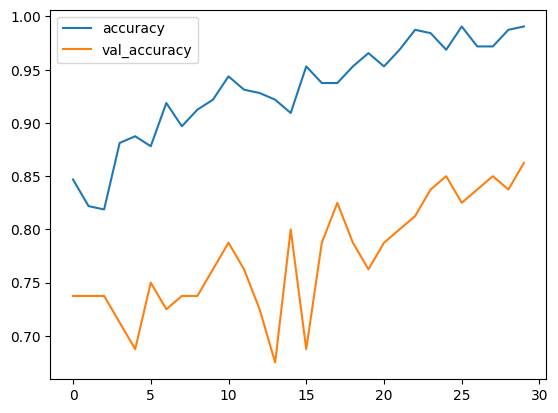

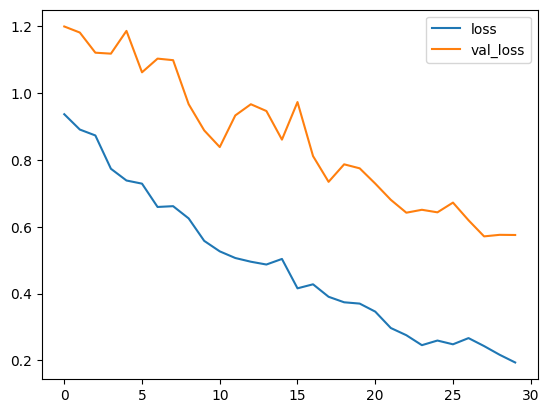

In [69]:
plt.figure(figsize=(10,3))
model_history_df[['accuracy','val_accuracy']].plot()
model_history_df[['loss','val_loss']].plot()

We can see the model is overfitting.